# Implementing a Decision Tree on the mango leaf dataset

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from graphviz import Digraph
from skimage.io import imread
from skimage.transform import resize

In [2]:
# mounting google drive
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


### Data Preprocessing

In [3]:
# init variables
dataset_path = "/content/drive/MyDrive/mangoleaf"
std_size = (64, 64)
X = []
y = []

In [4]:
"""
Loop to iterate through every single image in the dataset and performs two operations
(A) Resizes every single image in the dataset to standard size of (64,64) pixels
(B) Flattens each of the 2D (64,64) arrays into a 1D vector
"""
for label in os.listdir(dataset_path):
    label_dir = os.path.join(dataset_path, label)
    if os.path.isdir(label_dir):
        for image_file in os.listdir(label_dir):
            image_path = os.path.join(label_dir, image_file)
            image = imread(image_path)
            image = resize(image, std_size, anti_aliasing=True).flatten()
            X.append(image)
            y.append(label)

In [5]:
# converting to numpy ndarray
X = np.array(X)
y = np.array(y)
print(X)
print(y)

[[0.65397424 0.61138228 0.59542336 ... 0.61622264 0.59341357 0.59125247]
 [0.90202989 0.90987303 0.89810832 ... 0.88750989 0.87966675 0.88358832]
 [0.82642524 0.82642524 0.82642524 ... 0.39234274 0.48835463 0.14170545]
 ...
 [0.8514011  0.85924424 0.91022463 ... 0.56846162 0.57630476 0.6586577 ]
 [0.69504339 0.69896496 0.63621987 ... 0.29908524 0.30692837 0.22457543]
 [0.68024987 0.68417144 0.66064202 ... 0.63340823 0.63338478 0.60199872]]
['Bacterial Canker' 'Bacterial Canker' 'Bacterial Canker' ... 'Die Back'
 'Die Back' 'Die Back']


### Implementing Decision Tree

In [6]:
# training and test sets are split in an 8:2 ratio

feature_names = y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# generating the decision tree based on the training data
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=5)
clf = clf.fit(X_train, y_train)

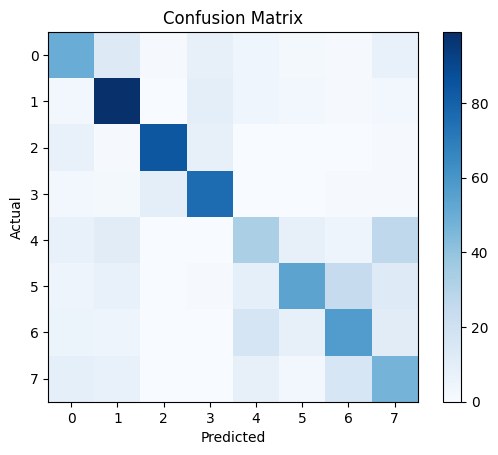

                  precision    recall  f1-score   support

     Anthracnose       0.56      0.58      0.57        86
Bacterial Canker       0.68      0.80      0.74       123
  Cutting Weevil       0.88      0.83      0.86       101
        Die Back       0.74      0.82      0.78        93
      Gall Midge       0.44      0.36      0.40        91
         Healthy       0.69      0.48      0.57       112
  Powdery Mildew       0.54      0.55      0.55       104
     Sooty Mould       0.43      0.52      0.47        90

        accuracy                           0.62       800
       macro avg       0.62      0.62      0.62       800
    weighted avg       0.63      0.62      0.62       800



In [9]:
# metrics
y_pred = clf.predict(X_test)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
# Calculate the accuracy, precision, recall, and f1-score
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average='macro')
rec = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.imshow(cm, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.colorbar()
plt.show()
# Print the classification report
print(classification_report(y_test, y_pred))

### Implementing Random Forest

In [10]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

In [11]:
# Train the model
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Make predictions
y_pred = rf_classifier.predict(X_test)

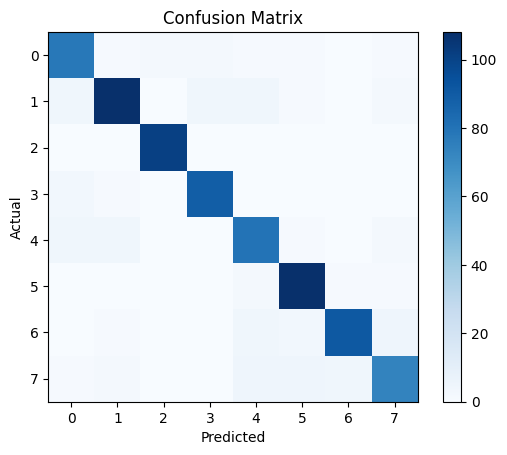

                  precision    recall  f1-score   support

     Anthracnose       0.87      0.91      0.89        86
Bacterial Canker       0.92      0.88      0.90       123
  Cutting Weevil       0.98      1.00      0.99       101
        Die Back       0.94      0.96      0.95        93
      Gall Midge       0.83      0.88      0.86        91
         Healthy       0.91      0.96      0.94       112
  Powdery Mildew       0.95      0.88      0.91       104
     Sooty Mould       0.87      0.81      0.84        90

        accuracy                           0.91       800
       macro avg       0.91      0.91      0.91       800
    weighted avg       0.91      0.91      0.91       800



In [ ]:
# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
plt.imshow(cm, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.colorbar()
plt.show()
print(report)

### Exploratory Data Analysis

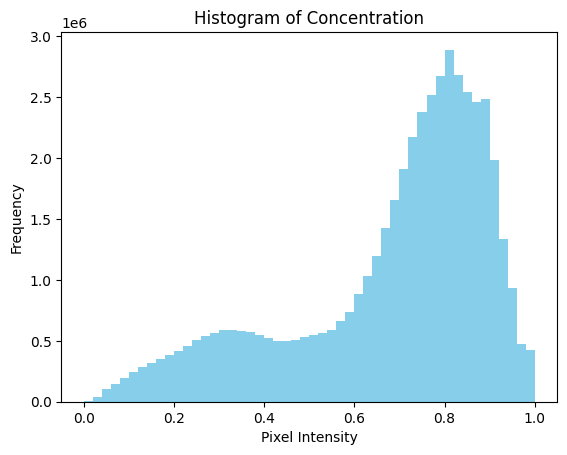

In [13]:
"""
A histogram of pixel intensities across the dataset shows the distribution of brightness levels, essentially translating to concetration for a given class.
"""

pixel_intensities = X.flatten()

plt.hist(pixel_intensities, bins=50, color='skyblue')
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.title("Histogram of Concentration")
plt.show()

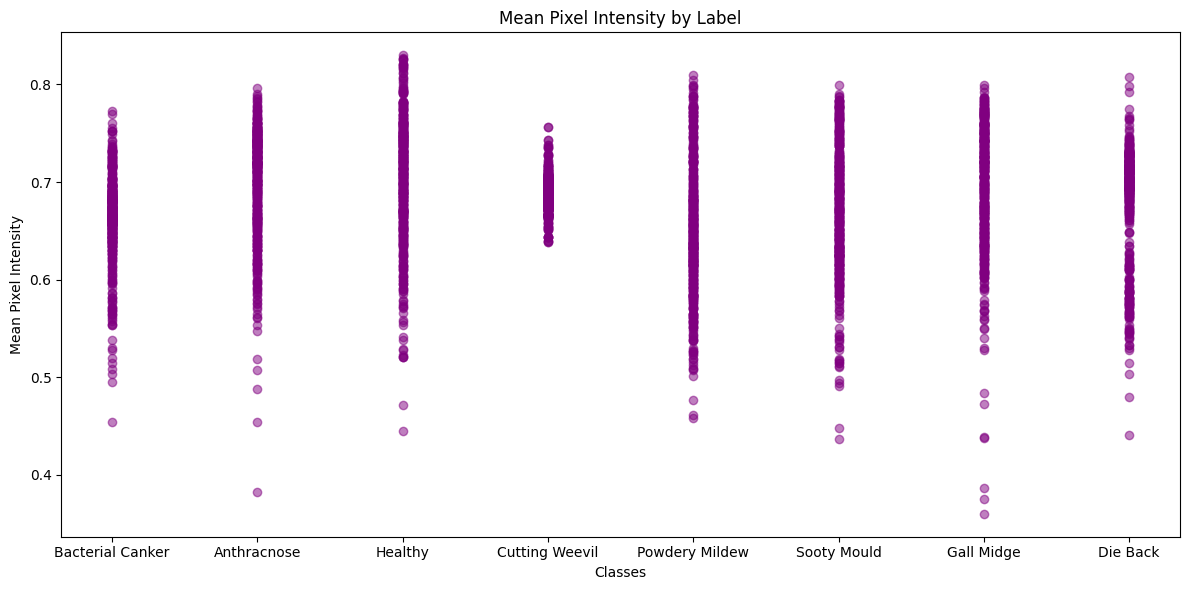

In [23]:
"""
A scatter plot of Pixel Intensity means vs Labels would define how the data is distributed
"""

mean_intensities = X.mean(axis=1)

plt.figure(figsize=(12,6))
plt.scatter(feature_names, mean_intensities, alpha=0.5, color='purple')
plt.xlabel("Classes")
plt.ylabel("Mean Pixel Intensity")
plt.title("Mean Pixel Intensity by Label")
plt.tight_layout()
plt.show()

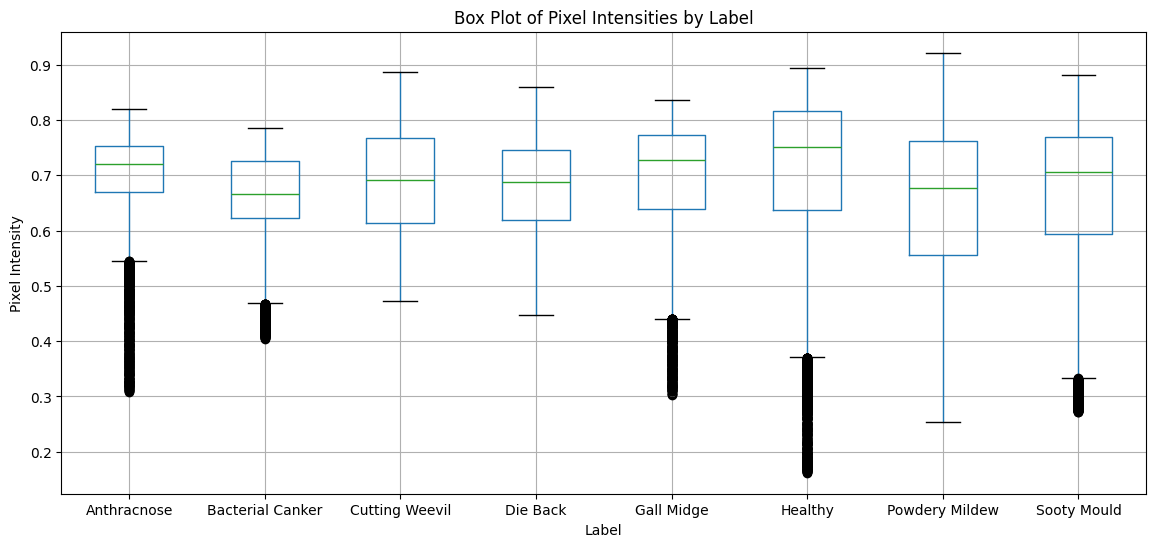

In [38]:
"""
A box plot of pixel intensities by label, showing the distribution of pixel intensities for each class.
"""

# Create a DataFrame for easy manipulation
df = pd.DataFrame(X)
df['label'] = feature_names

# Plot box plot
plt.figure(figsize=(14, 6))
df.groupby('label').mean().T.boxplot()
plt.xlabel("Label")
plt.ylabel("Pixel Intensity")
plt.title("Box Plot of Pixel Intensities by Label")
plt.show()


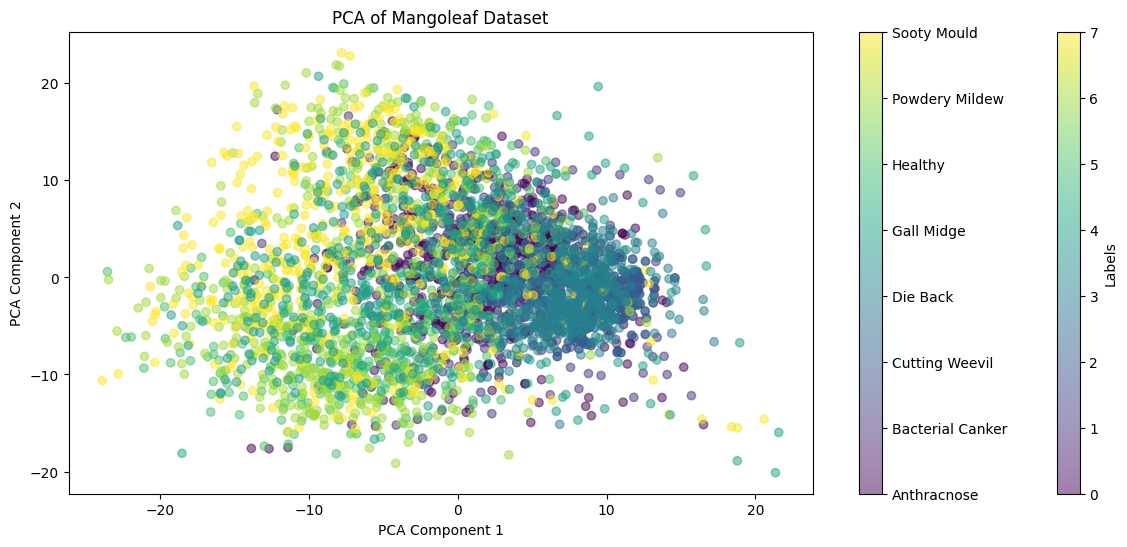

In [35]:
"""
Principal Component Analysis will allow us to reduce the dimensions of the dataset and visualize the images in a 2D space.
"""
from sklearn.decomposition import PCA

# Create a mapping of unique labels to numerical values
unique_labels = np.unique(feature_names)
label_mapping = {label: i for i, label in enumerate(unique_labels)}

# Convert feature_names to numerical labels using the mapping
numerical_labels = [label_mapping[label] for label in feature_names]

pca = PCA(n_components=2)
pca_result = pca.fit_transform(X)

plt.figure(figsize=(15, 6))

# Use numerical_labels for color mapping
scatter = plt.scatter(pca_result[:, 0], pca_result[:, 1], c=numerical_labels, cmap='viridis', alpha=0.5)

plt.colorbar(scatter, ticks=np.arange(len(unique_labels)), label='Labels')  # Add colorbar with label

# Update colorbar ticks with original labels
scatter.set_clim(0, len(unique_labels) - 1)  # Set color limits to match numerical labels
cbar = plt.colorbar(scatter)
cbar.set_ticks(np.arange(len(unique_labels)))
cbar.set_ticklabels(unique_labels)

plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("PCA of Mangoleaf Dataset")
plt.show()

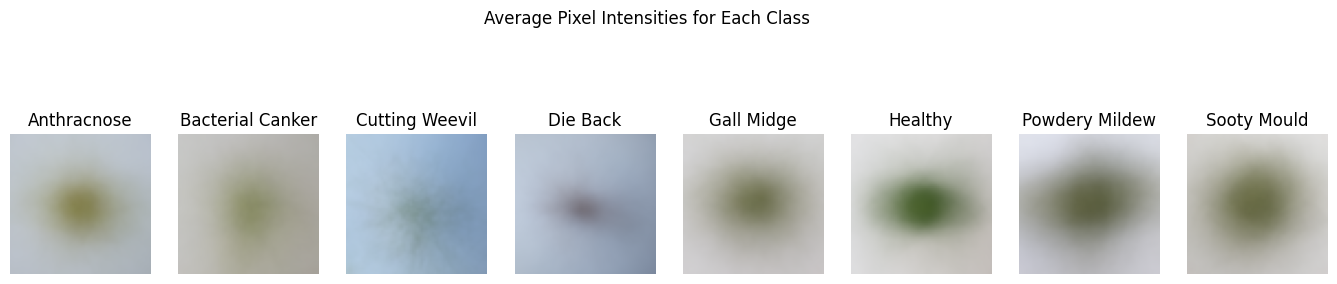

In [34]:
"""
Correlation heatmap based on the average pixel intensities for each class will allow us to visually realize what the color of each class looks like.
"""

unique_labels = np.unique(feature_names)
fig, axes = plt.subplots(1, len(unique_labels), figsize=(17, 4))

for i, label in enumerate(unique_labels):
    class_images = X[feature_names == label]
    mean_image = class_images.mean(axis=0)
    axes[i].imshow(mean_image.reshape(64, 64, 3), cmap="gray")
    axes[i].set_title(f"{label}")
    axes[i].axis("off")

plt.suptitle("Average Pixel Intensities for Each Class")
plt.show()